In [1]:
###### Applications Lab #1-- ATOC7500 Objective Analysis - bootstrapping
##### Originally coded by Prof. Kay (CU) with input from Vineel Yettella (CU ATOC Ph.D. 2018)
##### last updated January 16, 2019

###LEARNING GOALS:
###1) Working in an ipython notebook: read in csv file, make histogram plot
###2) Assessing statistical significance using bootstrapping

### GENERAL SETUP
%matplotlib inline  
# this enables plotting within notebook

import matplotlib   # library for plotting
import matplotlib.pyplot as plt #  later you will type plt.$COMMAND
import numpy as np   # basic math library  you will type np.$STUFF  e.g., np.cos(1)
import pandas as pd  # library for data analysis for text files (everything but netcdf files)
import scipy.stats as stats # imports stats functions https://docs.scipy.org/doc/scipy/reference/stats.html 

In [2]:
### Read in the data
filename='snow_enso_data.csv'
data=pd.read_csv(filename,sep=',')
data.head()

,Year,LovelandPass_April1SWE_inches,Nino34_anomaly_prevDec
0,1936,15.8,-0.04
1,1937,10.1,0.63
2,1938,12.1,0.22
3,1939,18.2,-0.79
4,1940,10.0,0.05


In [3]:
### Print the data column names
print(data.columns[0])
print(data.columns[1])
print(data.columns[2])

Year
LovelandPass_April1SWE_inches
Nino34_anomaly_prevDec


In [4]:
### Print the data values - LOOK AT YOUR DATA.  If new to Python - check out what happens when you remove .values.
print(data['Year'].values)
print(data['LovelandPass_April1SWE_inches'].values)
print(data['Nino34_anomaly_prevDec'].values)

[1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950
 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965
 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980
 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016]
[ 15.8  10.1  12.1  18.2  10.    9.9  13.9  17.9  11.4  13.3  11.4  17.4
  14.   14.   14.   19.   24.   17.3  11.2  13.5  21.2  17.5  14.9  18.7
  16.4  15.3  19.2  12.   12.7  19.9   6.3  14.6  16.1  14.2  20.7  19.
  16.2  12.   18.8  19.6  15.1  11.   22.1  16.7  20.    9.   19.8  15.5
  18.   12.3  18.2  11.3  15.9  12.1  13.8  13.2  14.2  21.8  17.8  17.2
  28.7  22.6  17.2  16.5  19.6  17.2  10.   19.9  13.1  15.6  22.4  19.7
  21.2  21.6  14.3  27.3  12.8  14.9  24.4  16.4  19. ]
[-0.04  0.63  0.22 -0.79  0.05  1.39  1.27 -1.24 -0.42 -0.26 -0.54  0.03
  0.18  0.38 -1.2  -1.

In [5]:
### Calculate the average snowfall on April 1 at Loveland Pass, Colorado
SWE_avg=data['LovelandPass_April1SWE_inches'].mean()
SWE_std=data['LovelandPass_April1SWE_inches'].std()
N_SWE=len(data.LovelandPass_April1SWE_inches)
print(SWE_avg)
print(SWE_std)
print(N_SWE)

16.33456790123457
4.221112427246731
81


In [6]:
### Print to figure out how to condition and make sure it is working.  Check out if new to Python.
#print(data.Nino34_anomaly_prevDec>1) ## this gives True/False
#print(data[data.Nino34_anomaly_prevDec>1])  ## where it is True, values will print

### Calculate the average SWE when it was an el nino year
SWE_avg_nino=data[data.Nino34_anomaly_prevDec>1.0]['LovelandPass_April1SWE_inches'].mean()
SWE_std_nino=data[data.Nino34_anomaly_prevDec>1.0]['LovelandPass_April1SWE_inches'].std()
N_SWE_nino=len(data[data.Nino34_anomaly_prevDec>1.0].LovelandPass_April1SWE_inches)
print(SWE_avg_nino)
print(SWE_std_nino)
print(N_SWE_nino)

15.29375
4.00174441129532
16


In [7]:
### Calculate the average SWE when it was an la nina year
SWE_avg_nina=data[data.Nino34_anomaly_prevDec<-1.0]['LovelandPass_April1SWE_inches'].mean()
SWE_std_nina=data[data.Nino34_anomaly_prevDec<-1.0]['LovelandPass_April1SWE_inches'].std()
N_SWE_nina=len(data[data.Nino34_anomaly_prevDec<-1.0].LovelandPass_April1SWE_inches)
print(SWE_avg_nina)
print(SWE_std_nina)
print(N_SWE_nina)

17.779999999999998
4.1063017772339006
15


In [8]:
### Bootstrap!!  Generate random samples of size N_SWE_nino and N_SWE_nina.  Do it once to see if it works.
P_random=np.random.choice(data.LovelandPass_April1SWE_inches,N_SWE_nino)
print(P_random)  ## LOOK AT YOUR DATA

[ 17.9  19.   17.2  19.7  15.8  19.9  17.2  12.   14.   15.8  11.3  21.2
  18.   18.7  14.6  19.2]


In [9]:
### Now Bootstrap Nbs times to generate a distribution of randomly selected mean SWE.
Nbs=1000
## initialize array
P_Bootstrap=np.empty((Nbs,N_SWE_nino))
## loop over to fill in array with randomly selected values
for ii in range(Nbs):
    P_Bootstrap[ii,:]=np.random.choice(data.LovelandPass_April1SWE_inches,N_SWE_nino)

## Calculate the means of your randomly selected SWE values.
P_Bootstrap_mean=np.mean(P_Bootstrap,axis=1)
#print(len(P_Bootstrap_mean))  ## check length to see if you averaged across the correct axis
#print(np.shape(P_Bootstrap_mean)) ## another option to look at the dimensions of a variable

P_Bootstrap_mean_avg=np.mean(P_Bootstrap_mean)
print(P_Bootstrap_mean_avg)
P_Bootstrap_mean_std=np.std(P_Bootstrap_mean)
print(P_Bootstrap_mean_std)
P_Bootstrap_mean_min=np.min(P_Bootstrap_mean)
print(P_Bootstrap_mean_min)
P_Bootstrap_mean_max=np.max(P_Bootstrap_mean)
print(P_Bootstrap_mean_max)

16.34975
1.07381185066
12.7875
20.05625


Text(0.5,1,'Bootstrapped Randomly Selected Mean SWE Values')

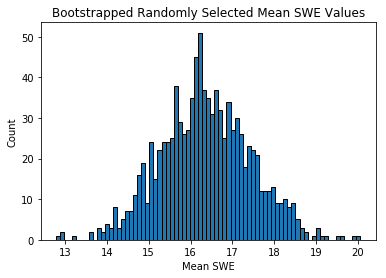

In [10]:
### Use matplotlib to plot a histogram of the bootstrapped means to compare to the conditioned SWE mean
binsize=0.1
min4hist=np.round(np.min(P_Bootstrap_mean),1)-binsize
max4hist=np.round(np.max(P_Bootstrap_mean),1)+binsize
nbins=int((max4hist-min4hist)/binsize)

plt.hist(P_Bootstrap_mean,nbins,edgecolor='black')
plt.xlabel('Mean SWE')
plt.ylabel('Count')
plt.title('Bootstrapped Randomly Selected Mean SWE Values')

In [11]:
## What is the probability that the snowfall was lower during El Nino by chance?
## Using Barnes equation (89) on page 16 to calculate probability using z-statistic
sample_mean=SWE_avg_nino
sample_N=1
population_mean=np.mean(P_Bootstrap_mean)
population_std=np.std(P_Bootstrap_mean)
xstd=population_std/np.sqrt(sample_N)
z_nino=(sample_mean-population_mean)/xstd
print("sample_mean - El Nino")
print(sample_mean)
print("population_mean")
print(population_mean)
print("population_std")
print(population_std)
print("Z-statistic (number of standard errors that the sample mean deviates from the population mean:")
print(z_nino)
print("Probability (percent):")
print((1-stats.norm.cdf(np.abs(z_nino)))*100)

sample_mean - El Nino
15.29375
population_mean
16.34975
population_std
1.07381185066
Z-statistic (number of standard errors that the sample mean deviates from the population mean:
-0.983412503175
Probability (percent):
16.2702229548


In [12]:
## What is the probability that the snowfall was higher during La Nina just due to chance?
## Using Barnes equation (89) on page 16 to calculate probability using z-statistic
sample_mean=SWE_avg_nina
sample_N=1
population_mean=np.mean(P_Bootstrap_mean)
population_std=np.std(P_Bootstrap_mean)
xstd=population_std/np.sqrt(sample_N)
z_nina=(sample_mean-population_mean)/xstd
print("sample_mean - La Nina")
print(sample_mean)
print("population_mean")
print(population_mean)
print("population_std")
print(population_std)
print("Z-statistic (number of standard errors that the sample mean deviates from the population mean):")
print(z_nina)
print("Probability (percent):")
print((1-stats.norm.cdf(np.abs(z_nina)))*100)

sample_mean - La Nina
17.779999999999998
population_mean
16.34975
population_std
1.07381185066
Z-statistic (number of standard errors that the sample mean deviates from the population mean):
1.33193724684
Probability (percent):
9.14404051432


In [13]:
### Strategy #2:
##apply a t-test to test the null that the means of the two samples are the same at the 95% confidence level (alpha=0.05)
### If pvalue < alpha - reject null hypothesis.
stats.ttest_ind(data['LovelandPass_April1SWE_inches'],data[data.Nino34_anomaly_prevDec>1.0]['LovelandPass_April1SWE_inches'])
print(stats.ttest_ind(data['LovelandPass_April1SWE_inches'],data[data.Nino34_anomaly_prevDec>1.0]['LovelandPass_April1SWE_inches']))
print('Reject the null hypthesis - ENSO snow years have the same mean as the full record')

Ttest_indResult(statistic=0.90858086296577123, pvalue=0.36587061724892378)
Reject the null hypthesis - ENSO snow years have the same mean as the full record


3.20379243827
-1.06359760802


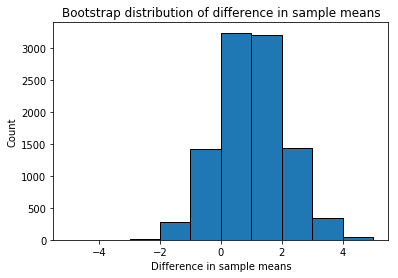

In [14]:
### Strategy #3 (provided by Vineel Yettella)
SWE = data['LovelandPass_April1SWE_inches']
SWE_nino = data[data.Nino34_anomaly_prevDec>1.0]['LovelandPass_April1SWE_inches']

#We start by setting up a null hypothesis H0. 
#Our H0 will be that the difference in means of the two populations that the samples came from is equal to zero.
#We will use the bootstrap to test this null hypothesis.

#We next choose a significance level for the hypothesis test
alpha = 0.05

#All hypothesis tests need a test statistic.
#Here, we'll use the difference in sample means as the test statistic.
#create array to hold bootstrapped test statistic values
bootstrap_statistic = np.empty(10000)

#bootstrap 10000 times
for i in range(1,10000):
    
    #create a resample of SWE by sampling with replacement (same length as SWE)
    resample_original = np.random.choice(SWE, len(SWE), replace=True)
    
    #create a resample of SWE_nino by sampling with replacement (same length as SWE_nino)
    resample_nino = np.random.choice(SWE_nino, len(SWE_nino), replace=True)
    
    #Compute the test statistic from the resampled data, i.e., the difference in means
    bootstrap_statistic[i] = np.mean(resample_original) - np.mean(resample_nino)

#Let's plot the distribution of the test statistic
plt.hist(bootstrap_statistic,[-5,-4,-3,-2,-1,0,1,2,3,4,5],edgecolor='black')
plt.xlabel('Difference in sample means')
plt.ylabel('Count')
plt.title('Bootstrap distribution of difference in sample means')

#Create 95% CI from the bootstrapped distribution. The upper limit of the CI is defined as the 97.5% percentile
#and the lower limit as the 2.5% percentile of the boostrap distribution, so that 95% of the 
#distribution lies within the two limits

CI_up = np.percentile(bootstrap_statistic, 100*(1 - alpha/2.0))
CI_lo = np.percentile(bootstrap_statistic, 100*(alpha/2.0))

print(CI_up)
print(CI_lo)

#We see that the confidence interval contains zero, so we fail to reject the null hypothesis that the difference
#in means is equal to zero